# COVID - Time series - Number of patients hospitalized prediction

Datasource : https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario

In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [2]:
rawdata=pd.read_csv("..\\COVID_GovernmentData\\covidtesting.csv") 

In [3]:
rawdata.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths
0,2020-01-26,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-27,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-28,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-30,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-31,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
rawdata['Resolved'] = rawdata['Resolved'].replace(np.nan, 0)
rawdata['Total Cases'] = rawdata['Total Cases'].replace(np.nan, 0)
rawdata['Deaths'] = rawdata['Deaths'].replace(np.nan, 0)
rawdata['Under Investigation'] = rawdata['Under Investigation'].replace(np.nan, 0)
rawdata['Number of patients hospitalized with COVID-19'] = rawdata['Number of patients hospitalized with COVID-19'].replace(np.nan, 0)

In [5]:
rawdata.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths
0,2020-01-26,NaN,NaN,1.0,NaN,0.0,0.0,0.0,NaN,NaN,9,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-27,NaN,NaN,2.0,NaN,0.0,0.0,0.0,NaN,NaN,19,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-28,NaN,NaN,1.0,1.0,0.0,0.0,1.0,NaN,NaN,11,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-30,NaN,NaN,0.0,2.0,0.0,0.0,2.0,NaN,NaN,27,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-31,NaN,NaN,0.0,2.0,0.0,0.0,2.0,NaN,NaN,17,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
processingdata = rawdata[["Reported Date","Number of patients hospitalized with COVID-19"]]

In [7]:
processingdata.head()

,Reported Date,Number of patients hospitalized with COVID-19
0,2020-01-26,0.0
1,2020-01-27,0.0
2,2020-01-28,0.0
3,2020-01-30,0.0
4,2020-01-31,0.0


In [8]:
processingdata['Reported Date'] = pd.to_datetime(processingdata['Reported Date'],infer_datetime_format=True)
Indexedprocessingdata = processingdata.set_index(['Reported Date'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
from datetime import datetime
Indexedprocessingdata.head(5)

,Number of patients hospitalized with COVID-19
Reported Date,
2020-01-26,0.0
2020-01-27,0.0
2020-01-28,0.0
2020-01-30,0.0
2020-01-31,0.0


C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


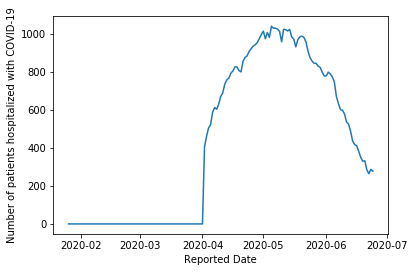

In [10]:
#ploting graph
plt.xlabel("Reported Date")
plt.ylabel("Number of patients hospitalized with COVID-19")
plt.plot(Indexedprocessingdata)


In [11]:
#determining rolling statistics
rolmean = Indexedprocessingdata.rolling(window=12).mean()

rolstd = Indexedprocessingdata.rolling(window=12).std()
print(rolmean,rolstd)

               Number of patients hospitalized with COVID-19
Reported Date                                               
2020-01-26                                               NaN
2020-01-27                                               NaN
2020-01-28                                               NaN
2020-01-30                                               NaN
2020-01-31                                               NaN
...                                                      ...
2020-06-20                                        450.166667
2020-06-21                                        424.000000
2020-06-22                                        397.750000
2020-06-23                                        376.916667
2020-06-24                                        356.166667

[140 rows x 1 columns]                Number of patients hospitalized with COVID-19
Reported Date                                               
2020-01-26                                               NaN


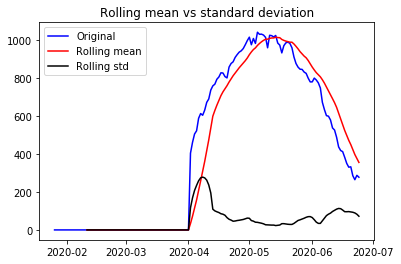

In [12]:
orig = plt.plot(Indexedprocessingdata, color='blue',label='Original')
mean = plt.plot(rolmean, color='red',label='Rolling mean')
std = plt.plot(rolstd, color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean vs standard deviation')
plt.show(block=False)

In [13]:
#perform Dickey-fuller test

from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-fuller test')
dftest = adfuller(Indexedprocessingdata['Number of patients hospitalized with COVID-19'])#, autolog='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statstic', 'p-value', '#Lags used', 'Number of Observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)' %key]= value
    
print(dfoutput)

Results of Dickey-fuller test
Test Statstic                   -1.140653
p-value                          0.698591
#Lags used                       2.000000
Number of Observations used    137.000000
Critical value (1%)             -3.479007
Critical value (5%)             -2.882878
Critical value (10%)            -2.578149
dtype: float64


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


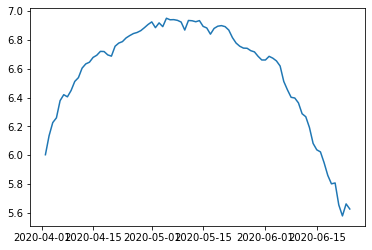

In [14]:
#estimate trend
Indexedprocessingdata_logscale = np.log(Indexedprocessingdata)
plt.plot(Indexedprocessingdata_logscale)

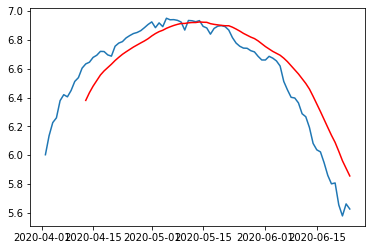

In [15]:
movingAverage = Indexedprocessingdata_logscale.rolling(window=12).mean()
movingStd = Indexedprocessingdata_logscale.rolling(window=12).std()
plt.plot(Indexedprocessingdata_logscale)
plt.plot(movingAverage, color='red')

In [16]:
datasetLogScaleMinusMovingAverage = Indexedprocessingdata_logscale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)



,Number of patients hospitalized with COVID-19
Reported Date,
2020-01-26,NaN
2020-01-27,NaN
2020-01-28,NaN
2020-01-30,NaN
2020-01-31,NaN
2020-02-03,NaN
2020-02-04,NaN
2020-02-05,NaN
2020-02-06,NaN


In [17]:
#Remove Nan values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Number of patients hospitalized with COVID-19
Reported Date,
2020-04-13,0.252880
2020-04-14,0.211219
2020-04-15,0.199239
2020-04-16,0.175322
2020-04-17,0.163832
2020-04-18,0.134242
2020-04-19,0.088044
2020-04-20,0.055864
2020-04-21,0.098951


In [18]:
from statsmodels.tsa.stattools import adfuller 

def test_stationarity(timeseries):
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingStd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #perform Dickey-fuller test
    print ('Results of Dickey-fuller test')
    dftest = adfuller(timeseries['Number of patients hospitalized with COVID-19'])#, autolog='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statstic', 'p-value', '#Lags used', 'Number of Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key]= value

    print(dfoutput)

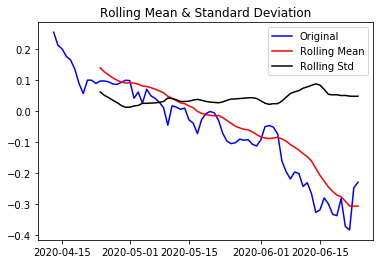

Results of Dickey-fuller test
Test Statstic                   0.034857
p-value                         0.961322
#Lags used                     10.000000
Number of Observations used    62.000000
Critical value (1%)            -3.540523
Critical value (5%)            -2.909427
Critical value (10%)           -2.592314
dtype: float64


In [19]:
test_stationarity(datasetLogScaleMinusMovingAverage)

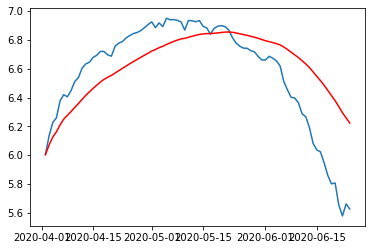

In [20]:
exponentialDecayWeightedAverage = Indexedprocessingdata_logscale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(Indexedprocessingdata_logscale)
plt.plot(exponentialDecayWeightedAverage, color='red')

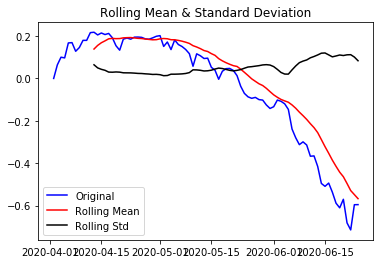

Results of Dickey-fuller test
Test Statstic                   1.444878
p-value                         0.997309
#Lags used                     10.000000
Number of Observations used    73.000000
Critical value (1%)            -3.523284
Critical value (5%)            -2.902031
Critical value (10%)           -2.588371
dtype: float64


In [21]:
datasetLogScaleMinusMovingExponentialDecayAverage = Indexedprocessingdata_logscale - exponentialDecayWeightedAverage
datasetLogScaleMinusMovingExponentialDecayAverage.dropna(inplace=True)
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

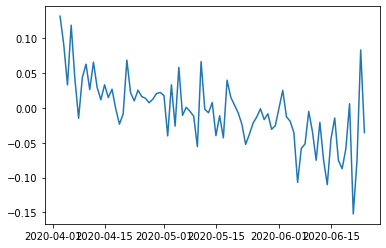

In [22]:
datasetLogDiffShifting = Indexedprocessingdata_logscale - Indexedprocessingdata_logscale.shift()

plt.plot(datasetLogDiffShifting)

In [23]:
#datasetLogDiffShifting
datasetLogDiffShifting = datasetLogDiffShifting.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

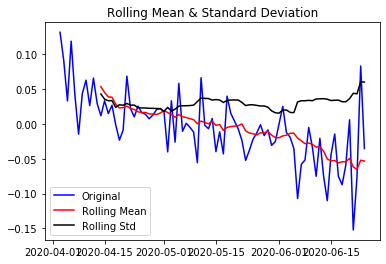

Results of Dickey-fuller test
Test Statstic                  -1.287236
p-value                         0.634991
#Lags used                     10.000000
Number of Observations used    72.000000
Critical value (1%)            -3.524624
Critical value (5%)            -2.902607
Critical value (10%)           -2.588679
dtype: float64


In [24]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose 


In [26]:
#Indexedprocessingdata_logscale
Indexedprocessingdata_logscale = Indexedprocessingdata_logscale.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [27]:
decomposition = seasonal_decompose(Indexedprocessingdata_logscale, freq = 12) 
#decomposition = seasonal_decompose(Indexedprocessingdata_logscale)

In [28]:

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

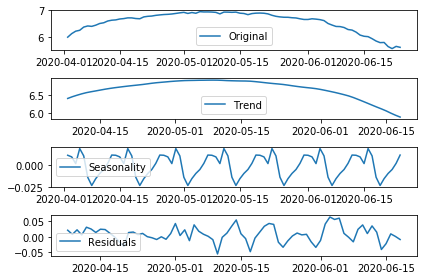

In [29]:



plt.subplot(411) 
plt.plot(Indexedprocessingdata_logscale, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
#plt.show()



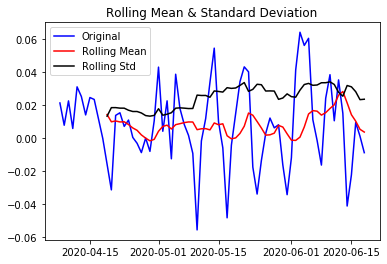

Results of Dickey-fuller test
Test Statstic                  -3.729547
p-value                         0.003716
#Lags used                      8.000000
Number of Observations used    63.000000
Critical value (1%)            -3.538695
Critical value (5%)            -2.908645
Critical value (10%)           -2.591897
dtype: float64


In [30]:
decomposedLodData = residual
decomposedLodData.dropna(inplace=True)
test_stationarity(decomposedLodData)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


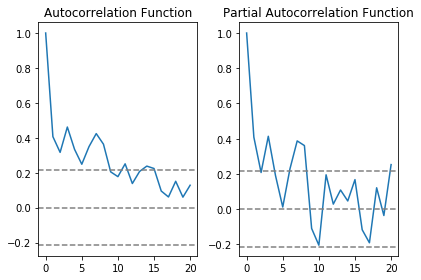

In [31]:
from statsmodels.tsa.stattools import acf, pacf 

lag_acf = acf(datasetLogDiffShifting, nlags=20) 
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 

#plot pacf
plt.subplot(122)
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.tight_layout()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Ploting AR model


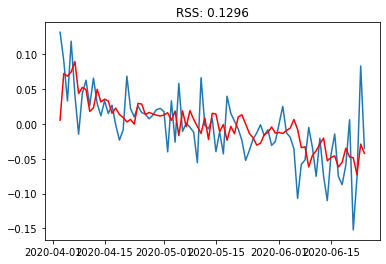

In [32]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(Indexedprocessingdata_logscale, order=(4,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_AR.fittedvalues -datasetLogDiffShifting['Number of patients hospitalized with COVID-19'])**2))
print('Ploting AR model')

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Ploting MA model


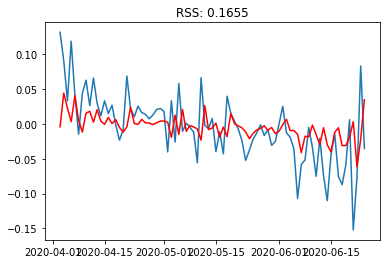

In [33]:
#MA Model

model = ARIMA(Indexedprocessingdata_logscale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_MA.fittedvalues -datasetLogDiffShifting['Number of patients hospitalized with COVID-19'])**2))
print('Ploting MA model')

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.1259')

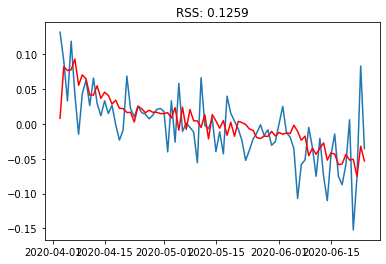

In [34]:
model = ARIMA(Indexedprocessingdata_logscale, order=(4,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_ARIMA.fittedvalues -datasetLogDiffShifting['Number of patients hospitalized with COVID-19'])**2))


In [35]:
prediction_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(prediction_ARIMA_diff.head())

Reported Date
2020-04-03    0.008058
2020-04-04    0.082180
2020-04-05    0.076742
2020-04-06    0.077846
2020-04-07    0.093208
dtype: float64


In [36]:
#convert to cumulative sum
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Reported Date
2020-04-03    0.008058
2020-04-04    0.090238
2020-04-05    0.166980
2020-04-06    0.244826
2020-04-07    0.338034
dtype: float64


In [37]:
prediction_ARIMA_log = pd.Series(Indexedprocessingdata_logscale['Number of patients hospitalized with COVID-19'].ix[0], index=Indexedprocessingdata_logscale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum, fill_value=0)
prediction_ARIMA_log.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Reported Date
2020-04-02    6.003887
2020-04-03    6.011945
2020-04-04    6.094125
2020-04-05    6.170867
2020-04-06    6.248713
dtype: float64

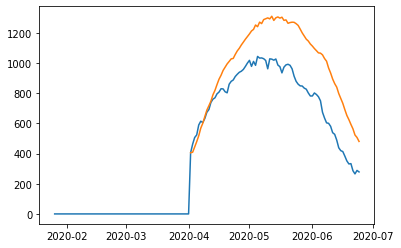

In [38]:
prediction_ARIMA =np.exp(prediction_ARIMA_log)
plt.plot(Indexedprocessingdata)
plt.plot(prediction_ARIMA)

In [39]:
Indexedprocessingdata_logscale

,Number of patients hospitalized with COVID-19
Reported Date,
2020-04-02,6.003887
2020-04-03,6.135565
2020-04-04,6.226537
2020-04-05,6.259581
2020-04-06,6.378426
...,...
2020-06-20,5.808142
2020-06-21,5.655992
2020-06-22,5.579730


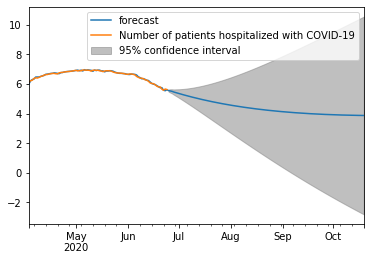

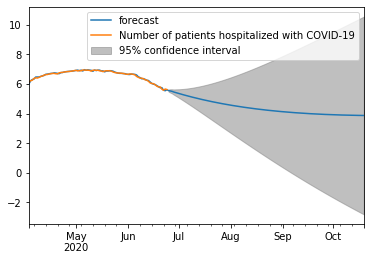

In [40]:
results_ARIMA.plot_predict(1,200)

In [41]:
results_ARIMA.forecast(steps=200)

(array([5.55571608, 5.53469202, 5.50668906, 5.46348793, 5.42951273,
        5.39847107, 5.36393184, 5.33062632, 5.29906297, 5.26732153,
        5.23594001, 5.20539599, 5.17529994, 5.14561602, 5.1164873 ,
        5.08786051, 5.05969281, 5.03200862, 5.00480304, 4.97805813,
        4.95177173, 4.9259405 , 4.90055598, 4.87561224, 4.85110435,
        4.82702624, 4.80337203, 4.78013634, 4.75731362, 4.73489837,
        4.71288524, 4.69126893, 4.67004419, 4.64920585, 4.62874883,
        4.60866808, 4.58895864, 4.56961562, 4.55063417, 4.53200953,
        4.51373699, 4.49581189, 4.47822967, 4.46098578, 4.44407578,
        4.42749524, 4.41123983, 4.39530525, 4.37968727, 4.36438172,
        4.34938446, 4.33469144, 4.32029863, 4.30620208, 4.29239787,
        4.27888216, 4.26565112, 4.25270101, 4.24002811, 4.22762878,
        4.2154994 , 4.2036364 , 4.19203628, 4.18069556, 4.16961082,
        4.15877868, 4.14819581, 4.13785893, 4.12776477, 4.11791015,
        4.1082919 , 4.0989069 , 4.08975208, 4.08